In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#for encoding
from sklearn.preprocessing import LabelEncoder
#for train test splitting
from sklearn.model_selection import train_test_split
#for decision tree object
from sklearn.tree import DecisionTreeClassifier
#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix
#for visualizing tree 
from sklearn.tree import plot_tree
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [3]:
# read
df = pd.read_csv(r"/Users/lovro_vrsalovic/Downloads/big_training_set_v10.csv")

In [4]:
def train_qda(df):
    df= df.dropna()
    y = df['churned']
    df1 = df.copy()
    X = df1.drop(['churned','is_opt_out','player_id','reg_on_mobile_web', 'age'], axis =1)
    X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
    
    knn = KNeighborsClassifier(n_neighbors=6)
    knn.fit(X_train, y_train)

    print('Decision Tree Classifier Created')
    scores = cross_val_score(knn, X, y)
    print("Cross-Validation scores: {}".format(scores))
    y_pred = knn.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print("Classification report - \n", classification_report(y_test,y_pred))

    y_pred_proba = knn.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
   
    return knn

In [5]:
def test_qda(model, df):
    #df= df.dropna()
    #y = df['churned']
    #df1 = df.copy()
    #X = df1.drop(['churned','is_opt_out','player_id','reg_on_mobile_web', 'age'], axis =1)
    #X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
    #y_pred = model.predict(X_test)
   
    #accuracy = accuracy_score(y_test, y_pred)
    #print("Accuracy: {:.2f}%".format(accuracy * 100))
    #return accuracy
    df1 = df.copy()
    X = df1.drop(['is_opt_out','player_id','reg_on_mobile_web', 'age'], axis =1)
    
    y_pred = model.predict(X)
    return y_pred

In [6]:
df = pd.read_csv(r"/Users/lovro_vrsalovic/Downloads/big_training_set_v10.csv")
rows = len(df)
df_train = df

Decision Tree Classifier Created
Cross-Validation scores: [0.84383345 0.84421491 0.84861645 0.86457936 0.84732085]
[[27652  1003]
 [ 3971  1453]]
Classification report - 
               precision    recall  f1-score   support

       False       0.87      0.96      0.92     28655
        True       0.59      0.27      0.37      5424

    accuracy                           0.85     34079
   macro avg       0.73      0.62      0.64     34079
weighted avg       0.83      0.85      0.83     34079



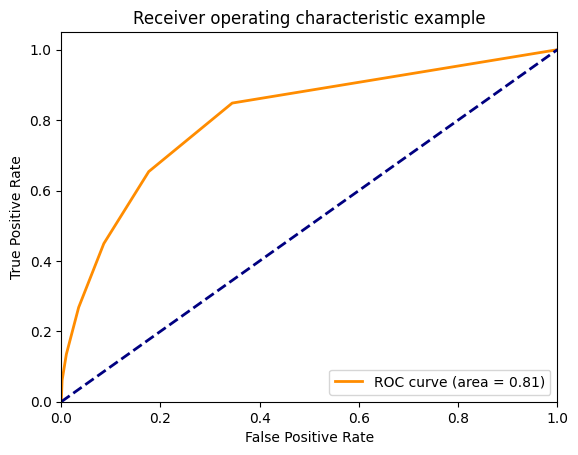

In [8]:
df_test = pd.read_csv(r"/Users/lovro_vrsalovic/Downloads/test_data_processed.csv")
model = train_qda(df_train)

solution = test_qda(model, df_test)
solution = pd.DataFrame(solution)
our_solution = solution.to_csv('solution_knn_ŽUNIĆ.csv')

